## Imports

In [2]:
from crismy.crismy import CRISM
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

ModuleNotFoundError: No module named 'crismy'

## Load a HSP data file

In [2]:
f = '/Users/andrew/Dropbox/Planetary/CRISM_Project/crism_data/hsp00017ba0_01_ra218l_trr3.img'
hsp = CRISM.open(f)

In [3]:
hsp

HSP Observation hsp00017ba0_01_ra218l_trr3

In [4]:
hsp.bands, hsp.lines, hsp.samples

(154, 2700, 64)

In [5]:
hsp.shape

(154, 2700, 64)

In [6]:
r = hsp.data[75,:,3:-1]
r /= np.max(r.flatten())
g = hsp.data[110,:,3:-1]
g /= np.max(g.flatten())
b = hsp.data[140,:,3:-1]
b /= np.max(b.flatten())
rgb = np.transpose(np.array([r,g,b]), axes=[1,2,0])
rgb.shape

(2700, 60, 3)

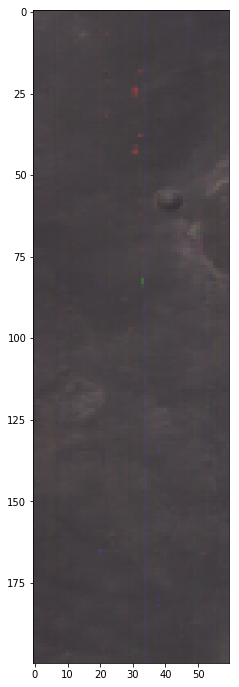

In [7]:
plt.figure(figsize=(12,12))
plt.imshow(rgb[0:200])
plt.imshow(rgb[200:400])

In [8]:
hsp.label['FILE'][0]['^ROWNUM_TABLE']

['HSP00017BA0_01_RA218L_TRR3.IMG', 415801]

In [9]:
hsp.label['FILE'][0]['ROWNUM_TABLE']

PVLObject([
  ('NAME', 'SELECTED ROWS FROM DETECTOR')
  ('INTERCHANGE_FORMAT', 'BINARY')
  ('ROWS', 154)
  ('COLUMNS', 1)
  ('ROW_BYTES', 2)
  ('DESCRIPTION',
   'The detector is subsampled in the spectral direction by selecting specific '
   'rows to be downlinked. This table provides a list of the rows selected for '
   'all frames in this multidimensional image cube.')
  ('COLUMN',
   {'BIT_MASK': 511,
    'BYTES': 2,
    'COLUMN_NUMBER': 1,
    'DATA_TYPE': 'MSB_UNSIGNED_INTEGER',
    'DESCRIPTION': 'Detector row number from which the data was taken.',
    'NAME': 'DETECTOR_ROW_NUMBER',
    'START_BYTE': 1})
])

In [10]:
import os

In [15]:
415801 - 1

415800

In [16]:
(415800*256) 

106444800

In [17]:
np.uint16(511)

511

In [18]:
with open(f, 'rb') as ff:
    ff.seek((415800*256),0)
    print(ff.tell()/256)
    x = ff.read(154*2)
    R = np.frombuffer(x, dtype='>i2')
    R = np.sort(np.array([x & np.uint16(511) for x in R]))
    print(R)
    print(R.shape)
    print(ff.tell()/256)


415800.0
[  0   3  17  28  46  57  66  72  82  93 104 123 142 157 176 187 196 198
 199 202 205 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223
 224 226 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243
 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261
 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279
 280 281 282 283 287 290 292 293 295 296 297 298 299 300 301 302 303 304
 305 306 307 312 318 322 327 331 334 337 340 345 350 360 368 369 370 371
 372 373 374 375 376 377 378 379 380 381 382 383 384 385 386 387 388 389
 395 403 405 406 407 413 422 433 438 442]
(154,)
415801.203125


In [20]:
with open(f, 'rb') as ff:
    ff.seek((415800*256),0)
    print(ff.tell()/256)
    x = ff.read(154*2)
    R = np.frombuffer(x, dtype='>i2') & 511
    print(R)
    print(R.shape)
    print(ff.tell()/256)

415800.0
[  0   3  17  28  46  57  66  72  82  93 104 123 142 157 176 187 196 198
 199 202 205 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223
 224 226 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243
 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261
 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279
 280 281 282 283 287 290 292 293 295 296 297 298 299 300 301 302 303 304
 305 306 307 312 318 322 327 331 334 337 340 345 350 360 368 369 370 371
 372 373 374 375 376 377 378 379 380 381 382 383 384 385 386 387 388 389
 395 403 405 406 407 413 422 433 438 442]
(154,)
415801.203125


## WOOOOOOOOOO

In [12]:
np.frombuffer(x,dtype=np.uint16).shape

(154,)

In [50]:
np.sort(np.frombuffer(x,dtype=np.uint16) & np.uint16(511))

array([  1,  12,  15,  48,  48,  52,  58,  58,  61,  63,  63,  63,  63,
        63,  63,  63,  63,  63,  63,  63,  63,  63,  63,  63,  63,  63,
        63,  63,  63,  63,  63,  63,  63,  63,  63,  63,  63,  63,  63,
        63,  63,  63,  63,  63,  63,  63,  63,  63,  63,  64,  64,  67,
        68,  68,  71,  71,  71,  76,  88, 100, 111, 118, 128, 141, 163,
       168, 176, 177, 179, 181, 184, 190, 195, 209, 215, 220, 242, 246,
       260, 277, 278, 289, 290, 291, 298, 304, 307, 308, 314, 315, 316,
       319, 319, 319, 319, 319, 319, 319, 319, 319, 319, 319, 319, 319,
       319, 319, 319, 319, 319, 319, 319, 319, 319, 319, 319, 319, 319,
       319, 319, 319, 319, 319, 320, 323, 327, 331, 341, 351, 361, 364,
       376, 380, 386, 389, 409, 424, 431, 435, 436, 437, 440, 464, 472,
       492, 493, 494, 499, 503, 504, 509, 511, 511, 511, 511],
      dtype=uint16)

In [14]:
np.frombuffer(x,dtype=np.uint16) & hsp.label['FILE'][0]['ROWNUM_TABLE']['COLUMN']['BIT_MASK']

array([ 15,  63, 291,  63,  48, 319, 242,  63,  68,  63, 278, 319, 100,
        63, 435,  63,   1, 319, 499, 319, 195, 319,  58, 319, 314,  63,
       184,  63, 277,  63, 361, 319,  61, 319, 290, 319, 176,  63, 409,
       319, 464,  63, 141, 319, 389, 319, 128,  63, 364, 319,  88,  63,
       504,  63, 431,  63,  52, 319, 493,  63, 380,  63,  12, 319, 351,
       319, 436, 319, 209, 319, 323, 319, 437, 319,  76,  63, 179,  63,
       424,  63, 509, 319,  58,  63, 118, 319, 307,  63, 298, 319, 494,
        63, 246, 319, 331,  63, 111,  63, 511,  71, 511,  71, 511,  71,
       511, 327,  67,  63, 190,  63, 472, 319,  68,  63, 440, 319, 289,
       320, 386,  64, 376,  64, 177,  63, 503,  63, 168, 319,  63, 319,
       315,  63, 163,  63, 308, 319, 316, 319, 220,  63, 260, 319, 215,
        63, 492,  63, 304,  63, 341,  63, 181,  63,  48,  63],
      dtype=uint16)

In [15]:
hsp.label['FILE'][0]['ROWNUM_TABLE']['COLUMN']['BIT_MASK']

511